In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("./results/betabeat_and_correctors.csv")

In [3]:
df.head()

,stopband_initial,stopband_final,success,K1NL_S19QS1J,K1NL_S1DQS1J,K1NL_S29QS1J,K1NL_S2DQS1J,K1NL_S39QS1J,K1NL_S3DQS1J,K1NL_S49QS1J,...,s65dx1v,s66dx1v,s67dx1v,s68dx1v,s69dx1v,s6adx1v,s6bdx1v,s6cdx1v,s6ddx1v,s6edx1v
0,0.010699,0.005826,True,0.118979,-0.239980,0.147072,0.025175,-0.122833,0.144323,-0.205704,...,5.750745,18.577345,5.794933,18.598613,18.840067,18.659698,5.779159,18.722935,18.726355,5.819613
1,0.025939,0.010270,True,0.136078,-0.194052,0.778890,-0.092796,-0.746110,0.694141,0.135788,...,5.545033,18.994871,5.633087,18.603788,19.022741,18.337127,5.796327,18.219345,19.253180,5.667806
2,0.009836,0.005692,True,0.043215,-0.040629,1.064151,0.226160,0.030440,0.019441,-0.278691,...,5.826722,18.680817,5.766724,18.744500,18.707554,18.773302,5.753014,18.793456,18.673511,5.842550
3,0.057279,0.019132,True,-0.012671,0.308603,-0.066757,-1.193966,-0.775875,1.023112,-0.272878,...,5.807549,19.037715,5.586466,18.930826,18.691455,18.687865,5.818325,18.681475,18.714761,5.775803
4,0.022980,0.007339,True,-0.090065,-0.058722,-0.026919,0.510022,-0.872430,1.148968,-0.753722,...,5.625511,18.847039,5.688353,18.654971,18.901938,18.508092,5.782492,18.471210,18.988306,5.714724


In [4]:
df.describe()

,stopband_initial,stopband_final,K1NL_S19QS1J,K1NL_S1DQS1J,K1NL_S29QS1J,K1NL_S2DQS1J,K1NL_S39QS1J,K1NL_S3DQS1J,K1NL_S49QS1J,K1NL_S4DQS1J,...,s65dx1v,s66dx1v,s67dx1v,s68dx1v,s69dx1v,s6adx1v,s6bdx1v,s6cdx1v,s6ddx1v,s6edx1v
count,9901.000000,9901.000000,9901.000000,9901.000000,9901.000000,9901.000000,9.901000e+03,9901.000000,9901.000000,9901.000000,...,9901.000000,9901.000000,9901.000000,9901.000000,9901.000000,9901.000000,9901.000000,9901.000000,9901.000000,9901.000000
mean,0.042149,0.015868,-0.011038,-0.026608,0.433705,0.154760,3.872913e-02,-0.036615,-0.109909,-0.176739,...,5.777075,18.773191,5.767537,18.801226,18.701796,18.810980,5.748142,18.797801,18.727040,5.816747
std,0.048611,0.016567,0.529348,0.566813,0.901331,0.810403,7.416117e-01,0.667915,0.627549,0.623458,...,0.199441,0.657958,0.200080,0.659289,0.655650,0.660074,0.200220,0.661701,0.655282,0.201079
min,0.002117,0.002119,-4.504957,-4.958169,-3.301607,-3.083342,-3.573183e+00,-3.983085,-3.314783,-3.974869,...,4.410317,14.287828,4.403139,14.555365,13.546266,14.039226,3.999357,14.548208,14.272032,4.248385
25%,0.016455,0.007298,-0.167475,-0.170824,-0.157940,-0.327550,-3.949298e-01,-0.398045,-0.437261,-0.497336,...,5.717887,18.588685,5.705646,18.616044,18.494111,18.619022,5.686763,18.604215,18.527438,5.757114
50%,0.023454,0.008830,-0.012529,-0.015241,0.368420,0.057759,-9.972328e-12,-0.022223,-0.050964,-0.093556,...,5.771663,18.759337,5.761053,18.790028,18.671742,18.798876,5.739656,18.782304,18.703537,5.811425
75%,0.038407,0.014118,0.132122,0.139106,1.051921,0.648471,4.252134e-01,0.281419,0.202887,0.143190,...,5.828504,18.941272,5.816906,18.974409,18.859346,18.983812,5.797067,18.964699,18.887559,5.867939
max,0.354746,0.101279,4.417325,5.030000,4.537693,4.001160,3.837884e+00,3.711757,3.277929,2.974384,...,7.700470,27.037507,7.490557,27.537095,24.828013,25.257957,7.410340,25.100840,23.917981,7.717396


In [5]:
# all corrections converged in local mins
df["success"].unique()

array([ True])

## optimization can return the values which make the lattice worse

In [6]:
df["ratio"] = df["stopband_final"] / df["stopband_initial"]

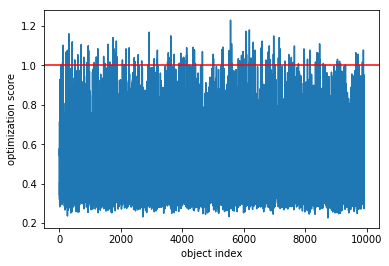

In [7]:
plt.plot(df["ratio"])
plt.xlabel("object index")
plt.ylabel("optimization score")
plt.axhline(1., c="r")

In [8]:
df = df[df["ratio"].le(0.999)]

print(f"dataset length is {len(df)}")

dataset length is 9760


### drop features with data leakage
before the optimization values of final stop band cannot be known
<br>the column success is the info from the future (successful convergence)

In [9]:
leakage = ["success", "ratio", "stopband_final"]
df = df.drop(leakage, axis=1)

## Clustering
if errorsets are close, the resulting optimal values are close as well
### the set of correctors (k1nl) is the target

In [10]:
target_cols = [name for name in df.columns if "k1nl" in name.lower()]

Y = df[target_cols]
X = df.copy().drop(target_cols, axis=1)

In [11]:
scaler_x = StandardScaler()
scaler_y = StandardScaler()

x_data = scaler_x.fit_transform(X)
y_data = scaler_y.fit_transform(Y)

X_scaled = pd.DataFrame(x_data, columns = X.columns)
Y_scaled = pd.DataFrame(y_data, columns=target_cols)

X_scaled.index = X.index
Y_scaled.index = Y.index

d_out = {
    'X':X_scaled, 
    'Y':Y_scaled,
    'X_initial':X,
    'Y_initial':Y,
    'scaler_x':scaler_x,
    'scaler_y':scaler_y
}

pickle.dump(d_out, open("./results/dataset_scaled.p", "wb"))

In [12]:
def clustering_score(df_target, df_cluster):
    columns = df_target.columns.tolist()
    df = df_cluster.join(df_target)
    out = []
    for name in columns:
        mse = np.std(df.groupby("Cluster")[name].transform("median") - df[name])**2
        out.append(mse)
    return np.max(df_target) / np.sqrt(np.mean(out))

In [13]:
d = {}
for i in range(2,50,5):
    X_cluster = X_scaled.copy()
    kmeans = KMeans(n_clusters=i, n_init=15)
    X_cluster["Cluster"] = kmeans.fit_predict(X_scaled)
    X_cluster["Cluster"] = X_cluster["Cluster"].astype('category')
    
    score = clustering_score(Y, X_cluster)
    
    print(f"n_clusters {i}, score = {np.mean(score)}")
    d[i] = np.mean(score)

n_clusters 2, score = 7.36032126415741
n_clusters 7, score = 8.600699909469055
n_clusters 12, score = 9.184627692898257
n_clusters 17, score = 9.622007260043489
n_clusters 22, score = 9.894949429759158
n_clusters 27, score = 10.182054839754723
n_clusters 32, score = 10.405910423772696
n_clusters 37, score = 10.544237404443892
n_clusters 42, score = 10.735166140458368
n_clusters 47, score = 10.885464322506047


Text(0, 0.5, 'signal to noise')

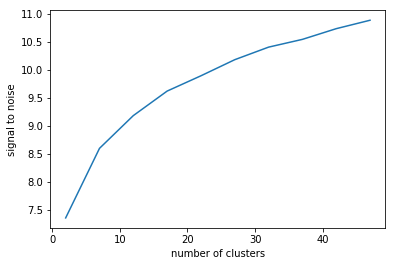

In [14]:
plt.plot(d.keys(), d.values())

plt.xlabel("number of clusters")
plt.ylabel("signal to noise")

## trade-off between n_clusters and signal / noise

In [15]:
n_clusters = 30

kmeans = KMeans(n_clusters=n_clusters, n_init=50)
X_scaled["Cluster"] = kmeans.fit_predict(X_scaled)
X_scaled["Cluster"] = X_scaled["Cluster"].astype('category')

# tmp dataframe with the target-vector
df = X_scaled.join(Y)

for name in target_cols:
    median = df.groupby("Cluster")[name].transform("median")
    X_scaled[f"{name}_median"] = median #(median - np.mean(median)) / np.std(median)

In [16]:
X_scaled.head()

,stopband_initial,s11dx1h,s12dx1h,s13dibpmh,s13dx1h,s14dx1h,s15dx1h,s16dx1h,s17dx1h,s18dx1h,...,K1NL_S24KM1Q_median,K1NL_S2EKM1Q_median,K1NL_S34KM1Q_median,K1NL_S3EKM1Q_median,K1NL_S44KM1Q_median,K1NL_S4EKM1Q_median,K1NL_S54KM1Q_median,K1NL_S5EKM1Q_median,K1NL_S64KM1Q_median,K1NL_S6EKM1Q_median
0,-0.657261,0.056160,-0.276833,-0.037557,0.219613,-0.229670,0.121501,0.052759,-0.013958,0.098403,...,0.006487,0.113587,-0.054950,0.000573,-0.072517,-0.087460,-0.000319,-0.035627,0.009315,0.029552
1,-0.344469,0.098216,0.109563,-0.515820,-0.345718,0.433960,-0.477922,0.607404,-0.752047,0.499128,...,0.915639,0.964432,-0.370706,-0.357917,-0.311888,-0.185711,0.313547,0.928935,-0.507430,-0.596587
2,-0.674983,0.120846,-0.249511,-0.108105,0.137149,-0.158234,0.111724,-0.049228,0.004689,0.152691,...,-0.153892,-0.568472,0.632064,0.289545,0.307686,0.530197,-0.283033,0.552986,-0.194137,0.052429
3,0.298757,-0.473100,0.516899,0.056562,-0.699675,0.658298,-0.723607,0.099612,-0.474318,-0.424345,...,-0.861879,-0.773659,0.434951,0.592699,0.174161,0.154478,-0.417435,-0.806849,0.475758,0.698750
4,-0.405202,-0.109201,0.274917,-0.302192,-0.513584,0.551358,-0.589152,0.326522,-0.585288,0.014718,...,0.006487,0.113587,-0.054950,0.000573,-0.072517,-0.087460,-0.000319,-0.035627,0.009315,0.029552


## Pipeline algorithm 
get measurement -> clean data (if noise added) -> data normalization -> get cluster values -> initial guess (k1nl_median)

In [17]:
d_out = {
    'kmeans':kmeans, # to transform test data
    'X':X_scaled, 
    'Y':Y_scaled,
    'X_initial':X,
    'Y_initial':Y,
    'scaler_x':scaler_x,
    'scaler_y':scaler_y}

pickle.dump(d_out, open("./results/dataset_clustered.p", "wb"))